In [11]:
from sqlalchemy import create_engine
from secret import postgres

engine = create_engine(postgres)

connection = engine.connect()


In [12]:
#Create pandas dataframe
import pandas as pd

salariesDF= pd.read_sql("select * from \"salaries\"", connection);

pd.set_option('display.expand_frame_repr', False);

salariesDF.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [13]:
#Create a histogram to visualize the most common salary ranges for employees.
import numpy as np
import matplotlib.pyplot as plt

salariesDF.describe()

,emp_no,salary
count,300024.000000,300024.000000
mean,253321.763392,52970.732451
std,161828.235540,14301.478491
min,10001.000000,40000.000000
25%,85006.750000,40000.000000
50%,249987.500000,48681.000000
75%,424993.250000,61758.000000
max,499999.000000,129492.000000


In [14]:
bins =[0,45000, 50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000, 90000, 95000, 100000, 105000, 110000, 115000, 120000, 125000, 130000]
bin_names = ['<45', '45-50', '50-55', '55-60', '60-65', '65-70', '70-75', '75-80', '80-85', '85-90', '90-95', '95-100', '100-105', '105-110', '110-115', '115-120', '120-125', '>125']
salariesDF['Salary Category'] = pd.cut(salariesDF["salary"], bins, labels=bin_names, include_lowest=True)
#salariesDF.head()
salariesDF2 = salariesDF.drop(columns=['emp_no'])

salariesDF2

,salary,Salary Category
0,60117,60-65
1,65828,65-70
2,40006,<45
3,40054,<45
4,78228,75-80
...,...,...
300019,40000,<45
300020,58058,55-60
300021,49597,45-50
300022,40000,<45


In [15]:
salariesGB = salariesDF2.groupby(salariesDF['Salary Category'])['salary'].count()
salariesGB

Salary Category
<45        126277
45-50       32195
50-55       30868
55-60       27049
60-65       22891
65-70       18514
70-75       14212
75-80       10602
80-85        7205
85-90        4639
90-95        2842
95-100       1443
100-105       724
105-110       344
110-115       141
115-120        54
120-125        19
>125            5
Name: salary, dtype: int64

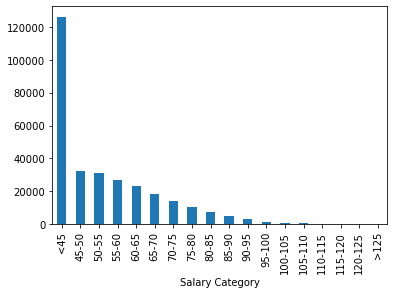

In [16]:
salariesGB.plot.bar()

(array([1.26271e+05, 3.21940e+04, 3.08710e+04, 2.70440e+04, 2.28960e+04,
        1.85170e+04, 1.42130e+04, 1.06010e+04, 7.20200e+03, 4.64300e+03,
        2.84200e+03, 1.44200e+03, 7.25000e+02, 3.44000e+02, 1.41000e+02,
        5.40000e+01, 1.90000e+01, 5.00000e+00]),
 array([     0,  45000,  50000,  55000,  60000,  65000,  70000,  75000,
         80000,  85000,  90000,  95000, 100000, 105000, 110000, 115000,
        120000, 125000, 130000]),
 <a list of 18 Patch objects>)

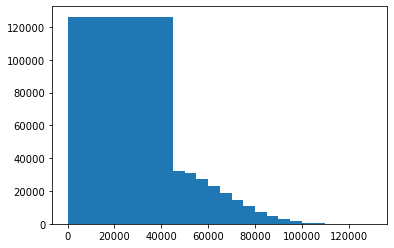

In [17]:
plt.hist(salariesDF['salary'], bins=bins)

In [18]:
#Create pandas dataframe for title

titlesDF= pd.read_sql("select * from \"titles\"", connection);

pd.set_option('display.expand_frame_repr', False);

titlesDF.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [19]:
#Create pandas dataframe for employees
employeesDF= pd.read_sql("select * from \"employees\"", connection);

pd.set_option('display.expand_frame_repr', False);

employeesDF.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [20]:
#Merge DF
employees_title = employeesDF.merge(titlesDF, left_on='emp_title_id', right_on = 'title_id')
employees_title.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,title_id,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,s0001,Staff
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,s0001,Staff
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,s0001,Staff
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,s0001,Staff
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,s0001,Staff


In [21]:
FinalDF = employees_title.merge(salariesDF, left_on='emp_no', right_on='emp_no')
FinalDF.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,title_id,title,salary,Salary Category
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,s0001,Staff,40000,<45
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,s0001,Staff,40000,<45
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,s0001,Staff,56087,55-60
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,s0001,Staff,87084,85-90
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,s0001,Staff,63016,60-65


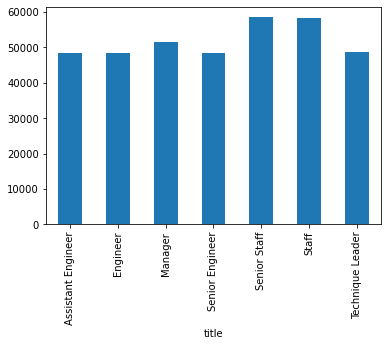

In [22]:
#Create a bar chart of average salary by title.
FinalGB = FinalDF.groupby(FinalDF['title'])['salary'].mean()
FinalGB
FinalGB.plot.bar()